

---


<h1><b><i>CODVEDA TECHNOLOGIES</b></h1>
<h1><b>Machine Learning INTERNSHIP TASK 01 | LEVEL 02(Intermediate)</b></h1>


---


<h2>Submitted by: Muhammad Usman</h2></i>


---





> Importing ALL Necessary Libraries and Modules Used In Task



In [12]:
#importing All necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics

<h1><b>STEP_01: LOADING AND PREPROCESSING THE DATASET</b></h1>



> Importing the Dataset



In [13]:
data=pd.read_csv("/content/churn-bigml-80.csv")



> Viewing top five rows of Dataset to ensure proper loading of dataset



In [14]:
# See first  rows of data to understand the format and ensure the accuance of data
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> Checking for null values

In [19]:
processed=data.copy()
processed['Churn'] = data['Churn'].astype(int)
#Encoding Text Features for better performace
l_en=LabelEncoder()
processed.drop(columns=['State'],inplace=True)
processed['International plan']=l_en.fit_transform(processed['International plan'])
processed['Voice mail plan']=l_en.fit_transform(processed['Voice mail plan'])

>seeing all columns of the dataset

In [20]:
# TO list all the columns of data, including feature and target
processed.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

>Saparating features and target Columns from dataset

In [21]:
#features in the data
X=processed[['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls']]
#target
Y=processed['Churn']

<h1><b>STEP_02: TRAINING THE LOGISTIC REGRESSION MODEL</b></h1>

>Splitting the Train and test data

In [22]:

 #Splitting the data for training and testing the Model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



> **FEATURE SCALING** fror improving the performance of model by centering the data around zero(mean=0) and scaling data to have Standard Deviation of unity (1)


In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

>Trainig The Model

In [24]:
# Calling and Training of the  Model (Logistic Regression)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

>making prediction Data

In [25]:
#Let the trained Model predict The test value of X
y_pred=model.predict(X_test)

<h1><b>STEP_03: INTERPRETING MODEL CO-EFFICIENTS</b></h1>






In [26]:
coeff=model.coef_[0]
OR=np.exp(coeff)

coef_df=pd.DataFrame({"Feature":X.columns,"Coefficients":coeff,"Odds Ratio":OR})
coef_df

,Feature,Coefficients,Odds Ratio
0,Account length,0.056669,1.058305
1,Area code,-0.027186,0.973180
2,International plan,0.649652,1.914874
3,Voice mail plan,-0.764426,0.465601
4,Number vmail messages,0.411734,1.509432
5,Total day minutes,0.314966,1.370213
6,Total day calls,0.016156,1.016287
7,Total day charge,0.314385,1.369417
8,Total eve minutes,0.156243,1.169110
9,Total eve calls,-0.005435,0.994580


<h1><b>STEP_04: EVALUATION OF THE MODEL</b></h1>

In [27]:
p_s=metrics.precision_score(y_test,y_pred)
r_s=metrics.recall_score(y_test,y_pred)
f1_s=metrics.f1_score(y_test,y_pred)
acc=metrics.accuracy_score(y_test,y_pred)
print("Precision Score:",p_s)
print("Recall Score:",r_s)
print("F1 Score:",f1_s)
print("Accuracy Score:",acc)

Precision Score: 0.375
Recall Score: 0.13043478260869565
F1 Score: 0.1935483870967742
Accuracy Score: 0.8595505617977528


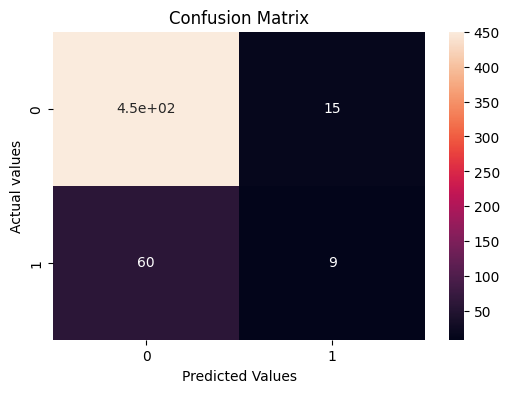

In [28]:
c_mat=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(c_mat, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()



> ROC Curve





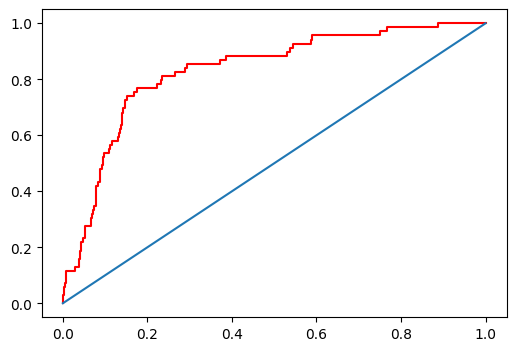

In [29]:
y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,color='red')
#Diagonal Line for random Classifier
plt.plot([0,1],[0,1])
plt.show()